# 탐색적 데이터 분석의 과정

## 데이터와의 첫만남

    - 1. 데이터의 출처와 주제에 대해 이해
        => 어디에서, 어떻게 생성된 것인지를 이해
        => 데이터의 이름, 구성요소, 그리고 데이터의 출처와 주제 등에 대해 알아야함
        
    - 2. 데이터의 크기
        => 데이의 크기에 따라 어떤 샘플링 진행할지 다름
    
    - 3. 데이터의 구성요소(feature) 확인

## 데이터의 속성 탐색

### 피처의 속성 탐색
    - 데이터에 질문을 던지는 것 => (학급의 신체검사 데이터라면, 이 학급의 기초통계량은 어느정도일까??)

### 피처간의 상관 관계 탐색
    - 피처 간의 공분산 또는 상관계수 확인
    
    

## 탐색한 데이터의 시각화
    - 데이터 시각화는 수치적 ㅍ자료만 가지고는 파악하기 애매한 패턴이나 인사이트 발견하는데 매우 유용 (직관적)

# 멕시코풍 프렌차이즈 chipotle의 주문 데이터 분석하기 (실습)

## 데이터 확인

In [59]:
import pandas as pd

paths = './data/chipotle.tsv'

data = pd.read_csv(paths, sep='\t')

print(data.shape) # Row : 4622, Column : 5
print()
print(data.info()) # choice_description : Null값 존재

(4622, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [60]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


    - order_id : 주문 번호
    - quantity : 주문 량
    - item_name : 주문 음식
    - choice_description : 주문상세옵션
    - item_price : 주문 가격

In [61]:
data['order_id'] = data['order_id'].astype('str') # 기초 통계 필요 없으므로 문자열로 변경

display(data.describe())

# 평균 1개 최대 15개시키네
# 여러개 시키는 경우는 별로 없는 듯

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


## order_id와 itemdml 개수


In [62]:
print(f'주문 아이디 개수 : {len(data["order_id"].unique())}') # 주문 테이블은 1834개라는 것
print(f'가능한 주문 음식 : {len(data["item_name"].unique())}') # 주문 음식 50개

주문 아이디 개수 : 1834
가능한 주문 음식 : 50


In [63]:
data['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

## 가장 많이 주문한 아이템 Top 10

In [64]:
top10 = data['item_name'].value_counts()[:10].index

for cookIdx in range(len(top10)):
    print(f'Top {cookIdx+1} : {top10[cookIdx]}')

Top 1 : Chicken Bowl
Top 2 : Chicken Burrito
Top 3 : Chips and Guacamole
Top 4 : Steak Burrito
Top 5 : Canned Soft Drink
Top 6 : Steak Bowl
Top 7 : Chips
Top 8 : Bottled Water
Top 9 : Chicken Soft Tacos
Top 10 : Chips and Fresh Tomato Salsa


## 아이템별 주문 개수

In [65]:
data.groupby('item_name')['order_id'].count()[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

## 아이템별 주문 총량

In [66]:
data.groupby('item_name')['quantity'].sum()[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

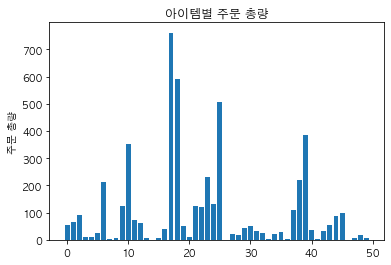

In [67]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
%matplotlib inline


item_name_list = list(data.groupby('item_name')['quantity'].sum().index)
item_name_sums = list(data.groupby('item_name')['quantity'].sum().values)

x_pos = np.arange(len(item_name_list))

plt.bar(x_pos, item_name_sums, align='center')
plt.ylabel('주문 총량')
plt.title('아이템별 주문 총량')
plt.show()



## 데이터 전처리 (item_price)

In [68]:
item_price_function = lambda x: float(x[1:])

data['item_price'] = data['item_price'].apply(item_price_function)
data['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

## 주문당 평균 계산금액

In [77]:
print(f'주문당 평균 계산 금액 : {round(data.groupby("order_id")["item_price"].sum().mean(), 2)}')

주문당 평균 계산 금액 : 18.81


## 한 주문에 10달러 이상인 번호

In [100]:
data_con1 = data.groupby('order_id')['item_price'].sum()

data_con1[data_con1 >= 10]

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

## 각 아이템의 가격 

In [125]:
data_cond2 = data[data.quantity == 1].groupby('item_name').min().sort_values(by='item_price', ascending=False)['item_price']
data_cond2[:10]

item_name
Steak Salad Bowl         9.39
Barbacoa Salad Bowl      9.39
Carnitas Salad Bowl      9.39
Carnitas Soft Tacos      8.99
Carnitas Crispy Tacos    8.99
Steak Soft Tacos         8.99
Carnitas Salad           8.99
Carnitas Bowl            8.99
Barbacoa Soft Tacos      8.99
Barbacoa Crispy Tacos    8.99
Name: item_price, dtype: float64

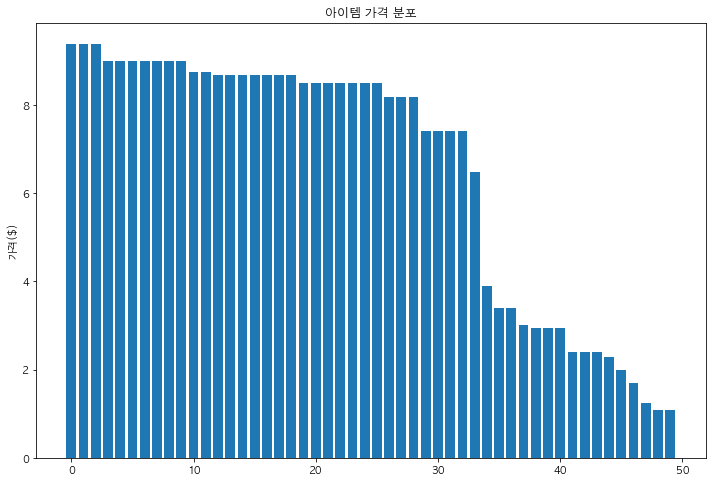

In [136]:
item_name_list = data_cond2.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = data_cond2.values.tolist()
plt.figure(figsize=(12, 8))
plt.bar(x_pos, item_price, align='center')
plt.ylabel('가격($)')
plt.title('아이템 가격 분포')
plt.show()




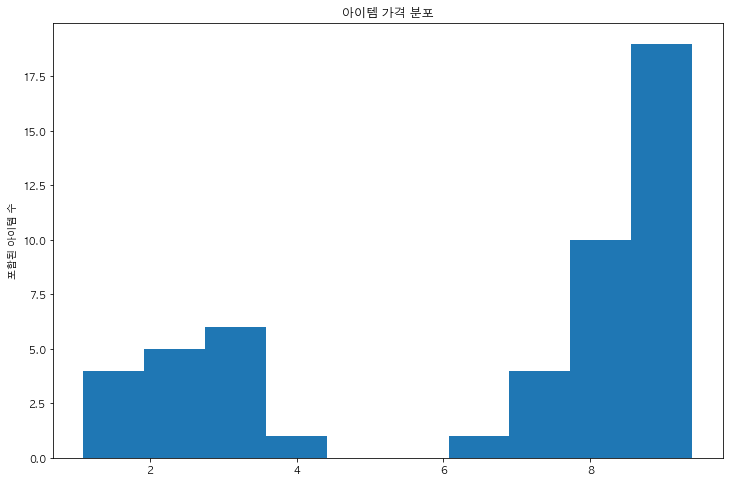

In [135]:
plt.figure(figsize=(12, 8))
plt.hist(item_price)
plt.ylabel('포함된 아이템 수')
plt.title('아이템 가격 분포')
plt.show()


## 가장 비싼 주문에서 팔린 아이템 개수

In [152]:
data.groupby('order_id').sum().sort_values(by='item_price',ascending=False)['quantity'][0]

23

## 'Veggie Salad Bowl'이 팔린 주문 수

In [174]:
len(data.loc[data['item_name'] == 'Veggie Salad Bowl'].groupby('order_id').sum())

18

## 'Chicken Bowl'을 2개이상 주문한 주문 수

In [185]:
(data.loc[data['item_name'] == 'Chicken Bowl', :].groupby('order_id').sum()['quantity'] >= 2).sum()

114